<a href="https://colab.research.google.com/github/joony0512/Linear_Programming/blob/main/LinearProgramming_%EA%B7%BC%EB%AC%B4%EC%9D%B8%EC%9B%90%EC%B5%9C%EC%86%8C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 104.7 MB/s eta 0:00:00


# linear programming 목적: 의사결정에 도움되는 것
## 1.변수정하기
## 2.목적함수정하기
## 3.제약식 정하기

2. 컴퓨터실의 운영시간은 오전 9:30-오후5:30이다.  
각 근무자들은 매시간 30분에 근무를 시작해 6시간 연속으로 근무한다.  
예를 들어, 오후 3:30에 근무를 시작한 사람은 당일 오후 5:30까지 2시간을 일하고, 다음날 오전 9:30부터 오후 1:30까지 4시간을 더 근무한다.  
각 시간대별 필요인원은 다음과 같다. 
최소인원의 일정 계획을 수립하여라.
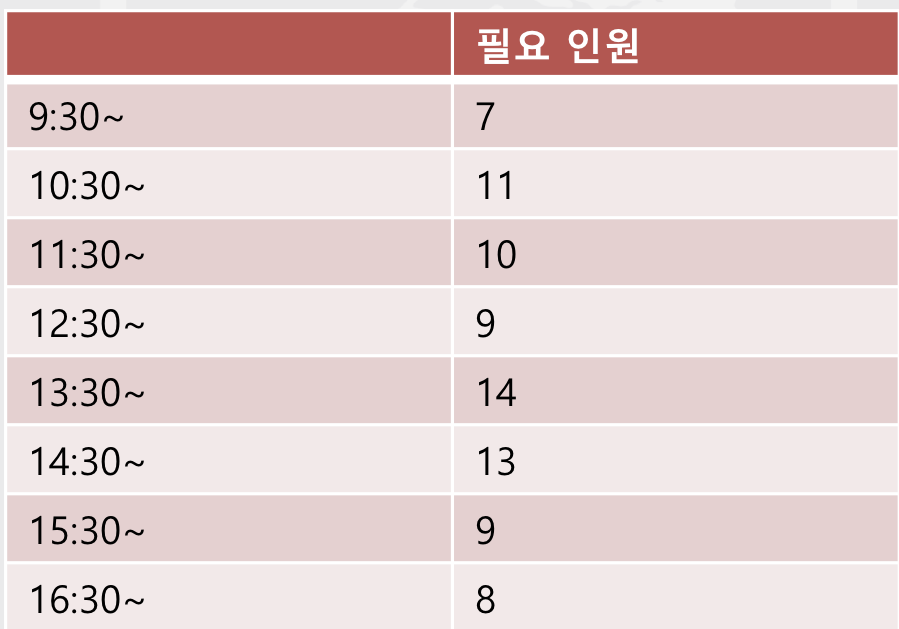


In [ ]:
from pulp import *

model = LpProblem(name="Practice#2", sense=LpMinimize)
# Define variables
variables = [LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 9)]

# Define constraints
constraints = []
constr_1_coeffs = [[1, 0, 0, 1, 1, 1, 1, 1],
                   [1, 1, 0, 0, 1, 1, 1, 1],
                   [1, 1, 1, 0, 0, 1, 1, 1],
                   [1, 1, 1, 1, 0, 0, 1, 1],
                   [1, 1, 1, 1, 1, 0, 0, 1],
                   [1, 1, 1, 1, 1, 1, 0, 0],
                   [0, 1, 1, 1, 1, 1, 1, 0],
                   [0, 0, 1, 1, 1, 1, 1, 1]]
for i in range(8):
    rhs_values = [7, 11, 10, 9, 14, 13, 9, 8]
    constr_sup = LpConstraint(
        e=LpAffineExpression([(variables[j], constr_1_coeffs[i][j]) for j in range(8)]),
        sense=LpConstraintGE,
        rhs=rhs_values[i],
        name=f"constraint_sup{i + 1}"
    )
    constraints.append(constr_sup)

# Define objective function
obj = LpAffineExpression([(variables[i],  1) for i in range(8)])
model += obj

# Add variables, constraints, and objective function to the model
for constraint in constraints:
    model += constraint

# Print the LP model
print(model)
model.writeLP('out.txt')

# Solve the model
model.solve()

# Print the solution
for variable in variables:
    print(f"{variable.name}: {variable.value()}")

print(f"Optimal objective value: {model.objective.value()}")

Practice#2:
MINIMIZE
1*x1 + 1*x2 + 1*x3 + 1*x4 + 1*x5 + 1*x6 + 1*x7 + 1*x8 + 0
SUBJECT TO
constraint_sup1: x1 + 0 x2 + 0 x3 + x4 + x5 + x6 + x7 + x8 >= 7

constraint_sup2: x1 + x2 + 0 x3 + 0 x4 + x5 + x6 + x7 + x8 >= 11

constraint_sup3: x1 + x2 + x3 + 0 x4 + 0 x5 + x6 + x7 + x8 >= 10

constraint_sup4: x1 + x2 + x3 + x4 + 0 x5 + 0 x6 + x7 + x8 >= 9

constraint_sup5: x1 + x2 + x3 + x4 + x5 + 0 x6 + 0 x7 + x8 >= 14

constraint_sup6: x1 + x2 + x3 + x4 + x5 + x6 + 0 x7 + 0 x8 >= 13

constraint_sup7: 0 x1 + x2 + x3 + x4 + x5 + x6 + x7 + 0 x8 >= 9

constraint_sup8: 0 x1 + 0 x2 + x3 + x4 + x5 + x6 + x7 + x8 >= 8

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous
x7 Continuous
x8 Continuous

x1: 2.0
x2: 4.0
x3: 3.0
x4: 0.0
x5: 4.0
x6: 0.0
x7: 0.0
x8: 1.0
Optimal objective value: 14.0
